My aim in this notebook is to predict reviews as positive or negative from text. To do this, I used machine learning algoritms. Also, deep learning solutions can be found in same repo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

In [2]:
# sklearn imports for modelling parts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

In [3]:
import nltk
from nltk.corpus import stopwords

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgm
from lightgbm import LGBMClassifier


In [2]:
pd.options.display.max_columns=100 # To hidden column in Dataframe

In [3]:
df=pd.read_csv('C:/Users/Osama Khan/OneDrive/Documents/Data Science/DS Project 2/cleaned_data.csv',low_memory=False)
df

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,overall,day,month,year,sentiment,review_clean
0,False,2004-08-09,AXHY24HWOF184,B0007Y09VO,{'Format:': ' Paperback'},crocheting for dummies by karen manthey & susa...,Terrific Book for Learning the Art of Crochet,5,9,8,2004,2,crocheting for dummies by karen manthey susan...
1,True,2017-04-06,A29OWR79AM796H,B0007Y09VO,{'Format:': ' Hardcover'},very helpful...,Four Stars,4,6,4,2017,2,very helpful
2,True,2017-03-14,AUPWU27A7X5F6,B0007Y09VO,{'Format:': ' Paperback'},easy to understand and a prompt service too,Five Stars,5,14,3,2017,2,easy to understand and a prompt service too
3,True,2017-02-14,A1N69A47D4JO6K,B0007Y09VO,{'Format:': ' Paperback'},my girlfriend use quite often,Four Stars,4,14,2,2017,2,my girlfriend use quite often
4,True,2017-01-29,AHTIQUMVCGBFJ,B0007Y09VO,{'Format:': ' Paperback'},arrived as described. very happy.,Very happy.,5,29,1,2017,2,arrived as described very happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,True,2014-04-24,A69MAQH7YSJT1,B0007Y6NZ262,NaN,use it,I like it,4,24,4,2014,2,use it
796,True,2014-04-23,A34E7AQBJKHJVJ,B0007Y6NZ263,NaN,i saw people learning the uke instantly at my ...,Better than I thought It Would Be - Great for ...,5,23,4,2014,2,i saw people learning the uke instantly at my ...
797,True,2014-04-22,AA4BO7WP95JAR,B0007Y6NZ264,NaN,i didn't think anyone could screw up a ukulele...,Terrible instrument. You get what you pay for.,1,22,4,2014,0,i didnt think anyone could screw up a ukulele ...
798,True,2014-04-14,A35BABWG5NUC4K,B0007Y6NZ265,NaN,i am really happy with this started pack. it h...,My learning Exp,5,14,4,2014,2,i am really happy with this started pack it ha...


In [6]:
df.isna().sum()

verified          0
reviewTime        0
reviewerID        0
asin              0
style           557
reviewText        0
summary           0
overall           0
day               0
month             0
year              0
sentiment         0
review_clean      1
dtype: int64

In [7]:
df.dropna(subset=['review_clean'],inplace=True) # Dropping null in review_clean column

In [8]:
df.isna().sum()

verified          0
reviewTime        0
reviewerID        0
asin              0
style           556
reviewText        0
summary           0
overall           0
day               0
month             0
year              0
sentiment         0
review_clean      0
dtype: int64

In [4]:
def calc_two_sentiment(overall):
    ''' This functions encodes the ratings 1 and 2 as 0 ,others as 1'''
    if overall>=3:
        return 1 # for positve 
    else:
        return 0 # for negative
    

In [5]:
df['sentiment']=df['overall'].apply(calc_two_sentiment) # applying converter to change the sentiment from 3 to 2 classed.

In [6]:
df['sentiment'].value_counts()

1    628
0    172
Name: sentiment, dtype: int64

In [7]:
df_0=df.loc[df['sentiment']==0].head(170) # for negative

In [8]:
df_1=df.loc[df['sentiment']==1].head(170) # for positive

In [9]:
frame=[df_0,df_1]
df_sampled=pd.concat(frame)

In [10]:
df_sampled['sentiment'].value_counts()

0    170
1    170
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

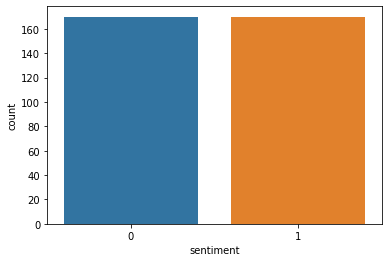

In [11]:
sns.countplot(x='sentiment',data=df_sampled)

In [12]:
df_sampled

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,overall,day,month,year,sentiment,review_clean
67,True,2015-02-04,A1JN8TZDMG8Y2F,B0007Y09VO,{'Format:': ' Paperback'},i have never really used it. i don't really ge...,Dummies books make no sense to me.,2,4,2,2015,0,i have never really used it i dont really get ...
68,True,2015-02-04,A2FZ9WX2OZALOL,B0007Y09VO,{'Format:': ' Paperback'},package arrived in the time frame that was gua...,Arrived with cover damage,2,4,2,2015,0,package arrived in the time frame that was gua...
91,True,2014-11-05,ADEM1JPNOTCF0,B0007Y09VO,{'Format:': ' Kindle Edition'},this book is just okay. crochet step-by-step b...,Crochet step-by-step by Sally Harding is much ...,2,5,11,2014,0,this book is just okay crochet stepbystep by s...
100,True,2014-09-13,AJQE3PHADIPEX,B0007Y09VO,{'Format:': ' Kindle Edition'},save yourself the oftalmologist's visit and bu...,Don't Buy the Kindle Edition!,1,13,9,2014,0,save yourself the oftalmologists visit and buy...
160,True,2013-02-22,A3BM4YBXXXCLFK,B0007Y09VO,{'Format:': ' Kindle Edition'},"this book was not what i thought, there should...",Not worth the money spent,1,22,2,2013,0,this book was not what i thought there should ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,True,2012-12-13,A2YJW4WFTN58FM,B0007Y09VO,{'Format:': ' Paperback'},it has proven to be a very useful book that i ...,Crocheting for Dummies,5,13,12,2012,1,it has proven to be a very useful book that i ...
172,True,2012-12-10,A1HKC507NJWPGL,B0007Y09VO,{'Format:': ' Paperback'},after months of trying to teach myself to croc...,"If you want to learn to crochet, this book is ...",5,10,12,2012,1,after months of trying to teach myself to croc...
173,True,2012-11-25,A296UIW2RLNPMY,B0007Y09VO,{'Format:': ' Paperback'},not what i expected but that is okay if i can ...,Its okay.,3,25,11,2012,1,not what i expected but that is okay if i can ...
174,True,2012-11-24,A2UTX90CSJ946,B0007Y09VO,NaN,very descriptive and helpful! isn't confusing ...,Love it!,5,24,11,2012,1,very descriptive and helpful isnt confusing li...


# Modeling Functions

I will use functions for my modeling and spliting parts because I want to get results easily when I changed something in model.

In [18]:
def model_split(df) :
    '''This function splits data to train and test, then vectorized reviews '''
    
    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], 
                                                        df['sentiment'], test_size=0.2, random_state=42)
   
        
    # define vectorize and fit to data     
    word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',
        analyzer='word',token_pattern=r'\w{1,}',stop_words='english',
        ngram_range=(1, 1),max_features=10000)

    word_vectorizer.fit(df['review_clean'])
    
    # train - test vectorized features - tranforming to suitable format for modeling
    train_word_features = word_vectorizer.transform(X_train) 
    test_word_features = word_vectorizer.transform(X_test)
    
    return train_word_features , test_word_features, y_train, y_test 

In [19]:
def model(df,classifier):
    '''this function gives modeling results and confusion matrix also'''
    train_word_features,test_word_features,y_train,y_test = model_split(df)
    classifier.fit(train_word_features, y_train)
    
    # calculating results 
    y_pred_train = classifier.predict(train_word_features)
    y_pred = classifier.predict(test_word_features)
    
    #for smart printing (learned from our lead instructor Bryan Arnold)
    print("Accuracy:"); print("="*len("Accuracy:"))
    print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {accuracy_score(y_test, y_pred)}")

    print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
    print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")
    
    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    plt.show()

Accuracy:
TRAIN: 0.9889705882352942
TEST: 0.9411764705882353

Balanced Accuracy:
TRAIN: 0.9888059701492538
TEST: 0.9427083333333333


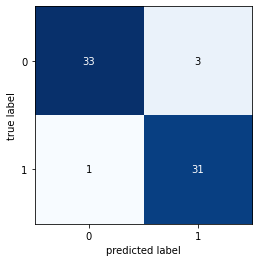

In [20]:
# Choosing and filtering classifier
classifier=LogisticRegression(class_weight='balanced',C=0.5,solver='sag')
model(df_sampled,classifier)

# One More Check to See roc-auc Score with Cross-Val

In [21]:
word_vectorizer=TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',
                               stop_words='english',ngram_range=(1,1),max_features=1000)

In [22]:
word_vectorizer.fit(df_sampled['review_clean'])

TfidfVectorizer(max_features=1000, stop_words='english',
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

In [23]:
word_features=word_vectorizer.transform(df_sampled['review_clean'])
scores=cross_val_score(classifier,word_features,df_sampled['sentiment'],cv=3,scoring='roc_auc')
print(scores.mean(),'+/-',scores.std())

0.9701602324524763 +/- 0.037903869807013484


I have got pretty good results 

# Decision Tree Classifier
Decision tree classifier is a supervised classification technique which splits data according to certain parameters continuously

Accuracy:
TRAIN: 0.8014705882352942
TEST: 0.7941176470588235

Balanced Accuracy:
TRAIN: 0.7987237724421372
TEST: 0.8055555555555556


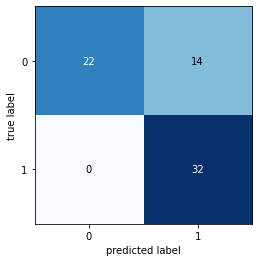

In [24]:
de_tree=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=5,class_weight='balanced')
model(df_sampled,de_tree)

I got good result but as compare to logreg the accuracy is less.With simple logreg my test accuracy is 95 but this ones gives 79

# Extra-Trees Classifier
Extra Trees works like a Random Forest. It builds multiple trees and splits nodes using random subsets of features. There are two main differences it does not samples without replacement, and nodes are split on random splits, not best splits. I also used different parameters and tuned them manually.

In [25]:
extra_tree=ExtraTreesClassifier(max_depth=5,criterion='entropy',min_samples_leaf=3,min_samples_split=15,random_state=42,
                               n_estimators=100,class_weight='balanced',n_jobs=-1)

Accuracy:
TRAIN: 0.9485294117647058
TEST: 0.8970588235294118

Balanced Accuracy:
TRAIN: 0.9477611940298507
TEST: 0.9027777777777778


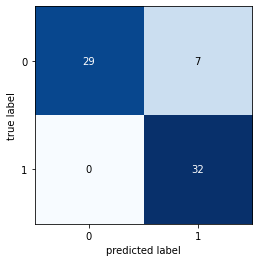

In [26]:
model(df_sampled,extra_tree)

As compare to DecisionTreeClassifier  test accuracy got increase but still simple logreg gives higher test accuracy 

# Random Forest Classifier
Random forest models can reduce overfitting risk by randomness as building n_estimators, bootstrapping sample and splitting nodes on the best split among a random subset of the features selected at every node and converting non-homogeneous node into best possibles

Accuracy:
TRAIN: 1.0
TEST: 0.8970588235294118

Balanced Accuracy:
TRAIN: 1.0
TEST: 0.9027777777777778


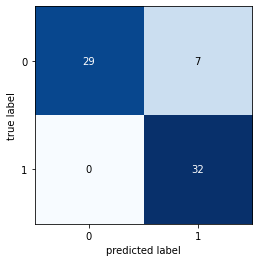

In [27]:
random_forest=RandomForestClassifier(n_estimators=100,n_jobs=-1,class_weight='balanced',criterion='entropy',max_features='sqrt',
                                    min_samples_split=5)
model(df_sampled,random_forest)

RandomForest gives good test accuracy but still simple logreg gives best test accuracy.Random forest give high accuracy but it is overfit. It could not split my target well. I can find best parameters for my model and tune it with grid search.

# GridSearchCV

In [28]:
grid_p={'n_estimators':[10,20,30],
       'criterion':['gini','entropy'],
       'max_features':['sqrt','log2'],
       'min_samples_split':[2,4,6]}

In [29]:
grid_search=GridSearchCV(random_forest,grid_p,n_jobs=-1,cv=3,scoring='roc_auc')
grid_search.fit(word_features,df_sampled['sentiment'])

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              max_features='sqrt',
                                              min_samples_split=5, n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 20, 30]},
             scoring='roc_auc')

In [30]:
grid_search.best_score_

0.9734863474475662

# XGBoost Classifier
XGBoost is an efficient and flexiable classifier which implements models with Gradient Boosting. Although, it is very usefull classifier, it can be overfit easily. So, parameter selection is very imporant for XGBoost. I can do grid search also for XGBoost to tune our parameters but it takes too much time. So, I played around our parameters manually and decided the best one.

Accuracy:
TRAIN: 0.9963235294117647
TEST: 0.9117647058823529

Balanced Accuracy:
TRAIN: 0.9962686567164178
TEST: 0.9149305555555556


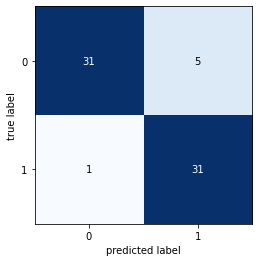

In [31]:
xgb=XGBClassifier(objective='multi:softmax',booster='gbtree',num_class=3,eval_metric='mlogloss',
                  eta=.1,max_depth=12,colsample_bytree=0.4,
                 learning_rate=0.1,max_delta_step=1)
model(df_sampled,xgb)

It gives good result but better than simple logreg

# LGBM Classifier
LGBM also constructs a gradient boosting model. It has some advantages that faster training speed and higher efficiency with lower memory usage. It is capable large data sets with significantly quicker than XGBoost. So, I tried this one also.

Accuracy:
TRAIN: 0.8639705882352942
TEST: 0.9264705882352942

Balanced Accuracy:
TRAIN: 0.8649686350854424
TEST: 0.9253472222222222


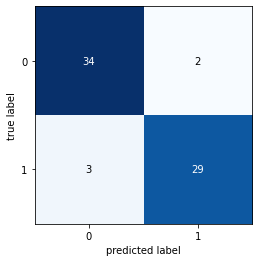

In [32]:
lgbm = LGBMClassifier(boosting_type='gbdt',max_depth =-1, colsample_bytree = .4,max_delta_step=1)
model(df_sampled, lgbm)

It gives higher than XGBM classifier but less than legreg.

In [33]:
# to keep result and see in dataframe
df_results=pd.DataFrame(columns=['model','train_balanced','test_balanced'])

In [34]:
df_results=df_results.append({'model':'Logreg',
                             'train_balanced':0.98,
                             'test_balanced':0.94},ignore_index=True)

df_results=df_results.append({'model':'Decision Tree',
                             'train_balanced':0.80,
                             'test_balanced':0.81},ignore_index=True)

df_results=df_results.append({'model':'Extra Tree',
                             'train_balanced':0.94,
                             'test_balanced':0.91},ignore_index=True)

df_results=df_results.append({'model':'Random Forest',
                             'train_balanced':0.99,
                             'test_balanced':0.92},ignore_index=True)
df_results=df_results.append({'model':'XGBM',
                             'train_balanced':0.99,
                             'test_balanced':0.91},ignore_index=True)
df_results=df_results.append({'model':'LGBM',
                             'train_balanced':0.86,
                             'test_balanced':0.92},ignore_index=True)

In [35]:
df_results

,model,train_balanced,test_balanced
0,Logreg,0.98,0.94
1,Decision Tree,0.80,0.81
2,Extra Tree,0.94,0.91
3,Random Forest,0.99,0.92
4,XGBM,0.99,0.91
5,LGBM,0.86,0.92


<AxesSubplot:xlabel='model', ylabel='test_balanced'>

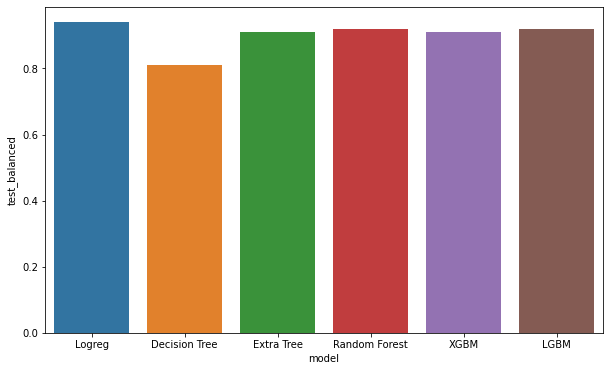

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x='model',y='test_balanced',data=df_results)

In [37]:
from sklearn.naive_bayes import MultinomialNB as MB


Accuracy:
TRAIN: 0.9852941176470589
TEST: 0.9411764705882353

Balanced Accuracy:
TRAIN: 0.9850746268656716
TEST: 0.9444444444444444


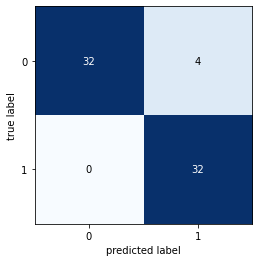

In [38]:
classifier_mb=MB()
model(df_sampled,classifier_mb)

In [39]:
import pickle
pickle_out=open('review.pkl','wb')
pickle.dump(df_sampled,pickle_out)
pickle_out.close()

In [40]:
pickle_out=open('review1.pkl','wb')
pickle.dump(df,pickle_out)
pickle_out.close

<function BufferedWriter.close>

In [13]:
df_sampled.to_csv('df.csv',index=False)